# Plots of figure 1,2,3

## Package import and function definitions

In [1]:
#import packages
import numpy as np
import pandas as pd
import plotnine as pn
import scipy.stats

#define functions used for binned average
def mse_fun(data):
    #print(data)
    if len(data)<1:
        mean_val = np.nan
        y_min = np.nan
        y_max = np.nan
    else:
        mean_val = data.mean()#[x.mean() for x in data]
        y_min = data.mean()-1*data.sem()#[x.mean()-x.sem() for x in data]
        y_max = data.mean()+1*data.sem()#[x.mean()+x.sem() for x in data]
    res = pd.DataFrame({'y': [mean_val], 'ymax': [y_max], 'ymin': [y_min]})
    return res

def mean_fun(data):
    if len(data)<1:
        mean_val = np.nan
        y_min = np.nan
        y_max = np.nan
    else:
        mean_val = data.mean()#[x.mean() for x in data]
        y_min = data.mean()
        y_max = data.mean()
    res = pd.DataFrame({'y': [mean_val], 'ymax': [y_max], 'ymin': [y_min]})
    return res

## Plot information

In [2]:
#define plot colors
colors1 = ['#6a3d9a','#33a02c','#ff7f00']
colors2 = ['#cab2d6','#b2df8a','#fdbf6f']

#define legends for each condition
plot_names = {'glycerol':'Glycerol','glucose':'Glucose','glucose8a':'Glucose +AA'}

In [3]:
#define source folder prefix folder containing Data_export
folder_prefix = '../'

## Load data and complete with plotting infos

In [4]:
fig_data = pd.read_csv(folder_prefix+'Data_export/Fig1_2_3.csv')

In [5]:
fig_data['plotnames'] = fig_data.condition.apply(lambda x: plot_names[x])
fig_data['plotnames'] = fig_data.plotnames.astype(pd.CategoricalDtype(list(plot_names.values()), ordered=True))


## Calculate mother daughter correlation

In [6]:
grouped_data = fig_data.groupby('condition')

In [7]:
correlations = {}
for gname, g in grouped_data:
    temp_corr = scipy.stats.pearsonr(g[['Lb','Lb_mother']].dropna().Lb,
                               g[['Lb','Lb_mother']].dropna().Lb_mother)
    correlations[gname]= temp_corr[0]
correlations = pd.Series(correlations)
correlations

glucose      0.656488
glucose8a    0.480491
glycerol     0.583551
dtype: float64

## Figure 1B

In [8]:
#bin data according the birth length and remove very small bins at edges
coli=[]
for x in fig_data.condition.unique():
    bin_np, bin_pos = np.histogram(fig_data[fig_data.condition==x].Lb,bins = np.arange(0,10,0.1))
    minpos = bin_pos[np.where(bin_np>15)[0][0]]
    maxpos = bin_pos[np.where(bin_np>15)[0][-1]]
    coli.append(fig_data[(fig_data.condition==x)&(fig_data.Lb>minpos)
                                  &(fig_data.Lb<maxpos)])
    
colidata_plot_stats = pd.concat(coli)

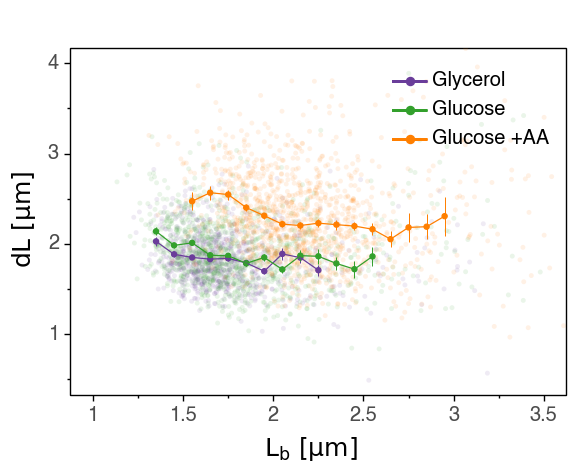

<ggplot: (-9223372036572709074)>


/Users/gw18g940/miniconda3/envs/test_doubleadder/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/Users/gw18g940/miniconda3/envs/test_doubleadder/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: ../Plots/fig1B.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


In [9]:
#do actual plot
psize = 0.4

legendx = r'$\rm{L_b\ [\mu m]}$'
legendy = r'$\rm{dL\ [\mu m]}$'

pn.theme_set(pn.theme_classic(base_size = 18, base_family='Helvetica'))

p = (pn.ggplot()
     + pn.geom_point(pn.aes(x='Lb', y='dL', fill = 'plotnames'),data= fig_data, size = 2,
                stroke = 0, alpha = 0.1, shape = 'o', color = '#FFFFFF00')
     +pn.scale_colour_manual(values=colors1,name="",
                         labels=plot_names)
     +pn.scale_fill_manual(values=colors1,name="",
                         labels=plot_names)
     +pn.stat_summary_bin(pn.aes(x='Lb', y = 'dL',color = 'plotnames'),
                          data=colidata_plot_stats, breaks = np.arange(0,10,0.1),
                          fun_data = mse_fun, size=psize, geom = 'pointrange')
     +pn.stat_summary_bin(pn.aes(x='Lb', y = 'dL',color = 'plotnames'),
                          data=colidata_plot_stats,breaks = np.arange(0,10,0.1),
                          fun_data = mean_fun, geom = 'line')
     + pn.coord_cartesian(xlim = (1.0, 3.5),ylim = (0.5, 4))
     + pn.labs(x = legendx,colour = '', y = legendy, font_style = 'normal')
     + pn.guides(fill=False)
     + pn.theme(legend_position = (0.75, 0.78),axis_line_x = pn.element_line(color="black", size = 0.5),
        axis_line_y = pn.element_line(color="black", size = 0.5),
                panel_border = pn.element_rect(colour = "black"),
                legend_background = pn.element_rect(fill = [1,0,0,0]),
                aspect_ratio=0.7,
                legend_entry_spacing=-5
               #text=pn.element_text(color = 'red',style='normal')
               )
     

    )
print(p)
pn.ggplot.save(p,folder_prefix+'Plots/fig1B.png',dpi=600)


## Figure 2

/Users/gw18g940/miniconda3/envs/test_doubleadder/lib/python3.7/site-packages/plotnine/layer.py:360: PlotnineWarning: stat_summary_bin : Removed 236 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/Users/gw18g940/miniconda3/envs/test_doubleadder/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 255 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


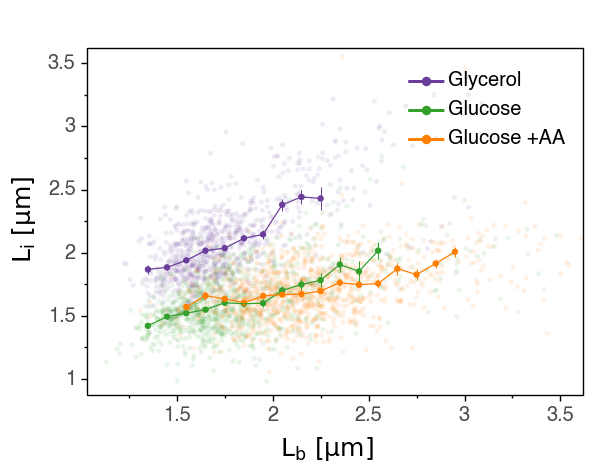

<ggplot: (-9223372036551346281)>


/Users/gw18g940/miniconda3/envs/test_doubleadder/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/Users/gw18g940/miniconda3/envs/test_doubleadder/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: ../Plots/fig2A.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
/Users/gw18g940/miniconda3/envs/test_doubleadder/lib/python3.7/site-packages/plotnine/layer.py:360: PlotnineWarning: stat_summary_bin : Removed 236 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/Users/gw18g940/miniconda3/envs/test_doubleadder/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 255 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


In [12]:
psize = 0.4

vary = 'Li'
legendx = r'$\rm{L_b\ [\mu m]}$'
legendy = r'$\rm{L_i\ [\mu m]}$'

pn.theme_set(pn.theme_classic(base_size = 18, base_family='Helvetica'))

p = (pn.ggplot()
     + pn.geom_point(pn.aes(x='Lb', y=vary, fill = 'plotnames'),data= fig_data, size = 2,
                stroke = 0, alpha = 0.1, shape = 'o', color = '#FFFFFF00')
     +pn.scale_colour_manual(values=colors1,name="",
                         labels=plot_names)
     +pn.scale_fill_manual(values=colors1,name="",
                         labels=plot_names)
     +pn.stat_summary_bin(pn.aes(x='Lb', y = vary,color = 'plotnames'),
                          data=colidata_plot_stats, breaks = np.arange(0,10,0.1),
                          fun_data = mse_fun, size=psize, geom = 'pointrange')
     +pn.stat_summary_bin(pn.aes(x='Lb', y = vary,color = 'plotnames'),
                          data=colidata_plot_stats,breaks = np.arange(0,10,0.1),
                          fun_data = mean_fun, geom = 'line')
     + pn.coord_cartesian(xlim = (1.15, 3.5),ylim = (1, 3.5))
     + pn.labs(x = legendx,colour = '', y = legendy, font_style = 'normal')
     + pn.guides(fill=False)
     + pn.theme(legend_position = (0.75, 0.78),axis_line_x = pn.element_line(color="black", size = 0.5),
        axis_line_y = pn.element_line(color="black", size = 0.5),
                panel_border = pn.element_rect(colour = "black"),
                legend_background = pn.element_rect(fill = [1,0,0,0]),
                aspect_ratio=0.7,
                legend_entry_spacing=-5
               #text=pn.element_text(color = 'red',style='normal')
               )
     

    )
print(p)
pn.ggplot.save(p,folder_prefix+'Plots/fig2A.png',dpi=600)

In [18]:
#bin data according the initiation length and remove very small bins at edges
coli=[]
for x in fig_data.condition.unique():
    #colidata_plot_stat= colidata_plot.copy()
    bin_np, bin_pos = np.histogram(fig_data[fig_data.condition==x].Li_prev.dropna(),bins = np.arange(0,10,0.05))
    minpos = bin_pos[np.where(bin_np>10)[0][0]]
    maxpos = bin_pos[np.where(bin_np>10)[0][-1]]
    coli.append(fig_data[(fig_data.condition==x)&(fig_data.Li_prev>minpos)
                                  &(fig_data.Li_prev<maxpos)])
    
colidata_plot_stats = pd.concat(coli)


/Users/gw18g940/miniconda3/envs/test_doubleadder/lib/python3.7/site-packages/plotnine/layer.py:360: PlotnineWarning: stat_summary_bin : Removed 25 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/Users/gw18g940/miniconda3/envs/test_doubleadder/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 359 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


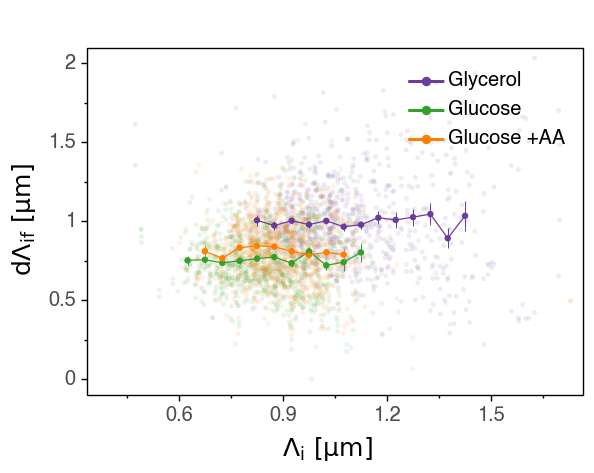

<ggplot: (-9223372036548877133)>


/Users/gw18g940/miniconda3/envs/test_doubleadder/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/Users/gw18g940/miniconda3/envs/test_doubleadder/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: ../Plots/fig2B.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
/Users/gw18g940/miniconda3/envs/test_doubleadder/lib/python3.7/site-packages/plotnine/layer.py:360: PlotnineWarning: stat_summary_bin : Removed 25 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/Users/gw18g940/miniconda3/envs/test_doubleadder/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 359 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


In [19]:
psize = 0.4
varx = 'Li_prev'
vary = 'dLambda_if'
legendy = r'$\rm{d\Lambda_{if}\ [\mu m]}$'
legendx = r'$\rm{\Lambda_i\ [\mu m]}$'

pn.theme_set(pn.theme_classic(base_size = 18, base_family='Helvetica'))

p = (pn.ggplot()
     + pn.geom_point(pn.aes(x=varx, y=vary, fill = 'plotnames'),data= fig_data, size = 2,
                stroke = 0, alpha = 0.1, shape = 'o', color = '#FFFFFF00')
     +pn.scale_colour_manual(values=colors1,name="",
                         labels=plot_names)
     +pn.scale_fill_manual(values=colors1,name="",
                         labels=plot_names)
     +pn.stat_summary_bin(pn.aes(x=varx, y = vary,color = 'plotnames'),
                          data=colidata_plot_stats, breaks = np.arange(0,10,0.05),
                          fun_data = mse_fun, size=psize, geom = 'pointrange')
     +pn.stat_summary_bin(pn.aes(x=varx, y = vary,color = 'plotnames'),
                          data=colidata_plot_stats,breaks = np.arange(0,10,0.05),
                          fun_data = mean_fun, geom = 'line')
     + pn.coord_cartesian(xlim = (0.4, 1.7),ylim = (0, 2))
     + pn.labs(x = legendx,colour = '', y = legendy, font_style = 'normal')
     + pn.guides(fill=False)
     + pn.theme(legend_position = (0.75, 0.78),axis_line_x = pn.element_line(color="black", size = 0.5),
        axis_line_y = pn.element_line(color="black", size = 0.5),
                panel_border = pn.element_rect(colour = "black"),
                legend_background = pn.element_rect(fill = [1,0,0,0]),
                aspect_ratio=0.7,
                legend_entry_spacing=-5
               )
     

    )
print(p)
pn.ggplot.save(p,folder_prefix+'Plots/fig2B.png',dpi=600)

## Figure 3

In [20]:
#bin data according the inverse growth rate and remove very small bins at edges
coli=[]
for x in fig_data.condition.unique():
    #colidata_plot_stat= colidata_plot.copy()
    bin_np, bin_pos = np.histogram(fig_data[fig_data.condition==x].lambda_inv.dropna(),
                                   bins = np.arange(0,180,5))
    minpos = bin_pos[np.where(bin_np>10)[0][0]]
    maxpos = bin_pos[np.where(bin_np>10)[0][-1]]
    coli.append(fig_data[(fig_data.condition==x)&(fig_data.lambda_inv>minpos)
                                  &(fig_data.lambda_inv<maxpos)])
    
colidata_plot_stats = pd.concat(coli)


In [21]:
##calculate correlation coefficients and p values
names2 = list(plot_names.values())
for ind, x in enumerate(fig_data.condition.unique()):
    coli_temp = colidata_plot_stats[['lambda_inv','Tid','condition']].dropna()
    pearson = scipy.stats.pearsonr(coli_temp[coli_temp.condition == x].lambda_inv,
                        coli_temp[coli_temp.condition == x].Tid)
    names2[ind] = names2[ind]+' R: '+str(np.format_float_scientific(pearson[0],precision=1))+\
    ", p: "+str(np.format_float_scientific(pearson[1],precision=1))
    print(pearson)

(0.4298016568471179, 1.722700091179899e-34)
(0.3937475501742588, 1.140367165574738e-35)
(0.3419646037513654, 1.9419912299751755e-29)


/Users/gw18g940/miniconda3/envs/test_doubleadder/lib/python3.7/site-packages/plotnine/layer.py:360: PlotnineWarning: stat_summary_bin : Removed 235 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/Users/gw18g940/miniconda3/envs/test_doubleadder/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 246 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


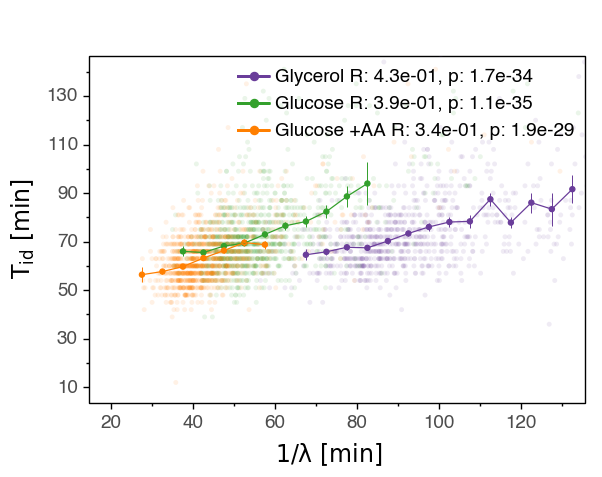

<ggplot: (319732856)>


/Users/gw18g940/miniconda3/envs/test_doubleadder/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/Users/gw18g940/miniconda3/envs/test_doubleadder/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: ../Plots/fig3A.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
/Users/gw18g940/miniconda3/envs/test_doubleadder/lib/python3.7/site-packages/plotnine/layer.py:360: PlotnineWarning: stat_summary_bin : Removed 235 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/Users/gw18g940/miniconda3/envs/test_doubleadder/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 246 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


In [22]:
psize = 0.4
varx = 'lambda_inv'
vary = 'Tid'
legendx = r'$\rm{1/\lambda\ [min]}$'
legendy = r'$\rm{T_{id}\ [min]}$'

pn.theme_set(pn.theme_classic(base_size = 17, base_family='Helvetica'))

p = (pn.ggplot()
     + pn.geom_point(pn.aes(x=varx, y=vary, fill = 'plotnames'),data= fig_data, size = 2,
                stroke = 0, alpha = 0.1, shape = 'o', color = '#FFFFFF00')
     
     +pn.scale_colour_manual(values=colors1,name="",
                         labels=names2)
     +pn.scale_fill_manual(values=colors1,name="",
                         labels=names2)
     +pn.stat_summary_bin(pn.aes(x=varx, y = vary,color = 'plotnames'),
                          data=colidata_plot_stats, breaks = np.arange(0,180,5),
                          fun_data = mse_fun, size=psize, geom = 'pointrange')
     +pn.stat_summary_bin(pn.aes(x=varx, y = vary,color = 'plotnames'),
                          data=colidata_plot_stats,breaks = np.arange(0,180,5),
                          fun_data = mean_fun, geom = 'line')
     +pn.scale_x_continuous(breaks = np.arange(20,130,20))
     +pn.scale_y_continuous(breaks = np.arange(10,140,20))
     #+ pn.coord_cartesian(xlim = (20, 130),ylim = (10, 140))
     + pn.coord_fixed(ratio=0.7*((110)/(130)),xlim = (20, 130),ylim = (10, 140))
     + pn.labs(x = legendx,colour = '', y = legendy, font_style = 'normal')
     + pn.guides(fill=False)
     + pn.theme(legend_position = (0.62, 0.81),axis_line_x = pn.element_line(color="black", size = 0.5),
        axis_line_y = pn.element_line(color="black", size = 0.5),
                panel_border = pn.element_rect(colour = "black"),
                legend_background = pn.element_rect(fill = [1,0,0,0]),
                #aspect_ratio=0.7,
                legend_entry_spacing=-5,
                #axis_text_y= pn.element_text(margin = {'t':0, 'b':0, 'l':0, 'r':20})
               #text=pn.element_text(color = 'red',style='normal')
               )
     

    )
print(p)
pn.ggplot.save(p,folder_prefix+'Plots/fig3A.png',dpi=600)

In [23]:
#bin data according the per origin initiation length and remove very small bins at edges
coli=[]
for x in fig_data.condition.unique():
    bin_np, bin_pos = np.histogram(fig_data[fig_data.condition==x].Li_prev.dropna(),bins = np.arange(0,10,0.05))
    minpos = bin_pos[np.where(bin_np>10)[0][0]]
    maxpos = bin_pos[np.where(bin_np>10)[0][-1]]
    coli.append(fig_data[(fig_data.condition==x)&(fig_data.Li_prev>minpos)
                                  &(fig_data.Li_prev<maxpos)])
    
colidata_plot_stats = pd.concat(coli)

In [24]:
##calculate correlation coefficients and p values
names2 = list(plot_names.values())
for ind, x in enumerate(fig_data.condition.unique()):
    coli_temp = colidata_plot_stats[['Li_prev','dLambda_ib','condition']].dropna()
    pearson = scipy.stats.pearsonr(coli_temp[coli_temp.condition == x].Li_prev,
                        coli_temp[coli_temp.condition == x].dLambda_ib)
    names2[ind] = names2[ind]+' R: '+str(np.format_float_scientific(pearson[0],precision=1))+\
    ", p: "+str(np.format_float_scientific(pearson[1],precision=1))
    print(pearson)

(-0.05455326998115258, 0.14225366929530764)
(-0.03274465693212806, 0.3235286993339665)
(0.03542310518073872, 0.26356500865005916)


/Users/gw18g940/miniconda3/envs/test_doubleadder/lib/python3.7/site-packages/plotnine/layer.py:360: PlotnineWarning: stat_summary_bin : Removed 25 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/Users/gw18g940/miniconda3/envs/test_doubleadder/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 359 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


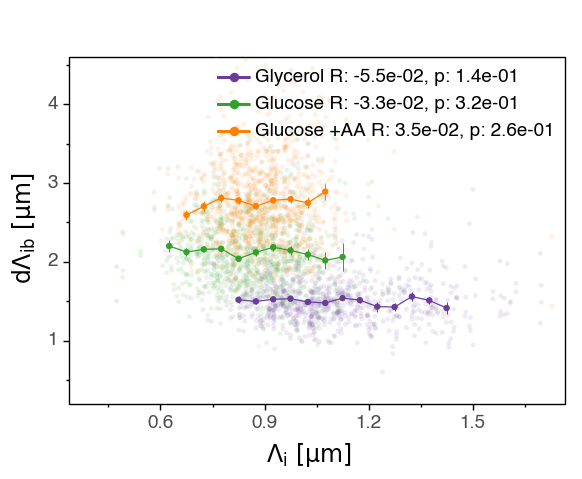

<ggplot: (303351395)>


/Users/gw18g940/miniconda3/envs/test_doubleadder/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/Users/gw18g940/miniconda3/envs/test_doubleadder/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: ../Plots/fig3B.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
/Users/gw18g940/miniconda3/envs/test_doubleadder/lib/python3.7/site-packages/plotnine/layer.py:360: PlotnineWarning: stat_summary_bin : Removed 25 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/Users/gw18g940/miniconda3/envs/test_doubleadder/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 359 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


In [25]:
psize = 0.4
varx = 'Li_prev'
vary = 'dLambda_ib'
legendy = r'$\rm{d\Lambda_{ib}\ [\mu m]}$'
legendx = r'$\rm{\Lambda_i\ [\mu m]}$'

pn.theme_set(pn.theme_classic(base_size = 17, base_family='Helvetica'))

p = (pn.ggplot()
     + pn.geom_point(pn.aes(x=varx, y=vary, fill = 'plotnames'),data= fig_data, size = 2,
                stroke = 0, alpha = 0.1, shape = 'o', color = '#FFFFFF00')
     
     +pn.scale_colour_manual(values=colors1,name="",
                         labels=names2)
     +pn.scale_fill_manual(values=colors1,name="",
                         labels=names2)
     +pn.stat_summary_bin(pn.aes(x=varx, y = vary,color = 'plotnames'),
                          data=colidata_plot_stats, breaks = np.arange(0,10,0.05),
                          fun_data = mse_fun, size=psize, geom = 'pointrange')
     +pn.stat_summary_bin(pn.aes(x=varx, y = vary,color = 'plotnames'),
                          data=colidata_plot_stats,breaks = np.arange(0,10,0.05),
                          fun_data = mean_fun, geom = 'line')
     + pn.coord_cartesian(xlim = (0.4, 1.7),ylim = (0.4, 4.4))
     + pn.coord_fixed(ratio=0.7*((1.7-0.4)/(4.4-0.4)),xlim = (0.4, 1.7),ylim = (0.4, 4.4))
     + pn.labs(x = legendx,colour = '', y = legendy, font_style = 'normal')
     + pn.guides(fill=False)
     + pn.theme(legend_position = (0.62, 0.81),axis_line_x = pn.element_line(color="black", size = 0.5),
        axis_line_y = pn.element_line(color="black", size = 0.5),
                panel_border = pn.element_rect(colour = "black"),
                legend_background = pn.element_rect(fill = [1,0,0,0]),
                #aspect_ratio=0.7,
                legend_entry_spacing=-5,
                #axis_text_y= pn.element_text(margin = {'t':0, 'b':0, 'l':0, 'r':20})
               #text=pn.element_text(color = 'red',style='normal')
               )
     

    )
print(p)
pn.ggplot.save(p,folder_prefix+'Plots/fig3B.png',dpi=600)